In [ ]:
import pandas as pd

### Expected - observed 

Figure saved successfully at: C:/Users/maliz/thesa/UKbiobank/plots_for_thesis/expected_minus_observed_differences.png


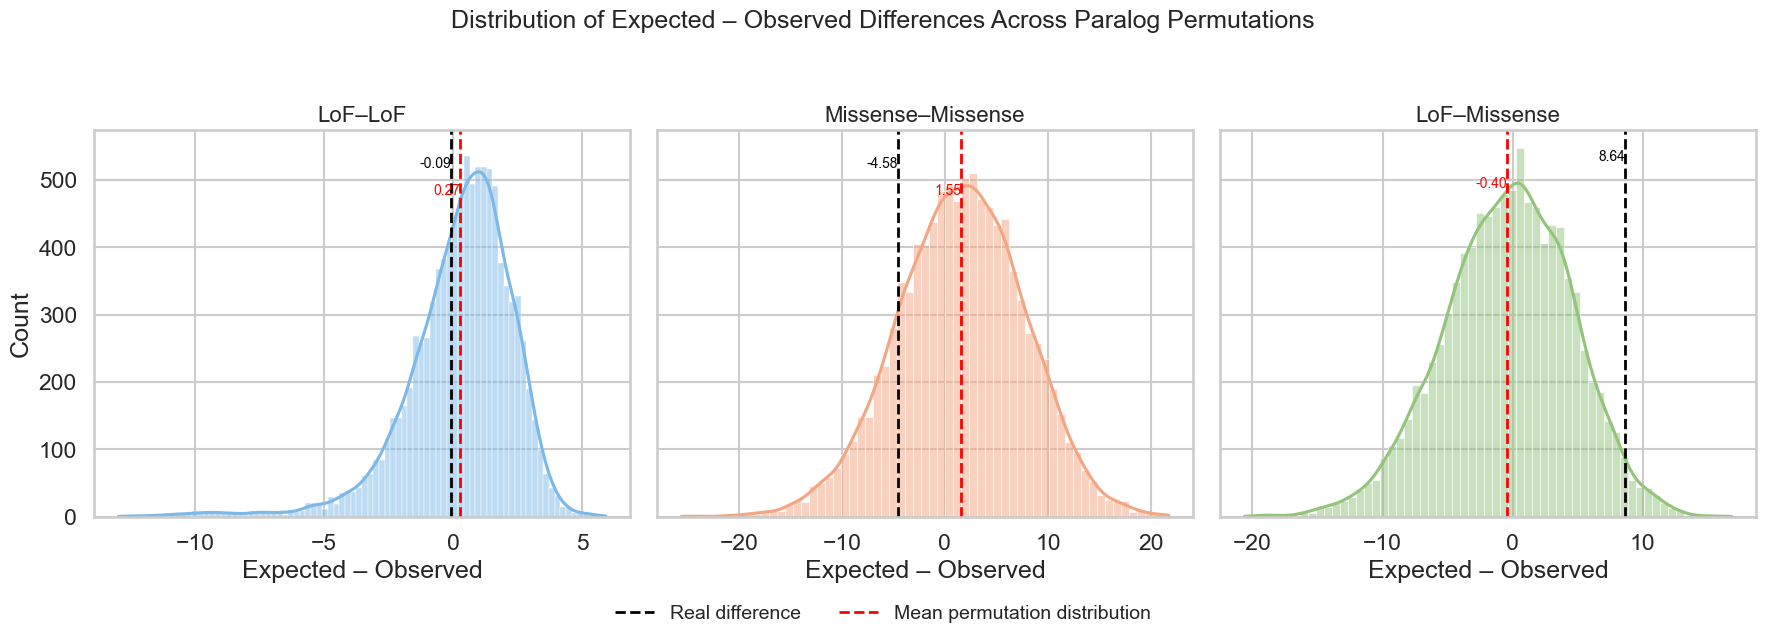

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Style settings ---
sns.set(style="whitegrid", context="talk")

perm_folder = "C:/Users/maliz/thesa/UKbiobank/data/permutation"
paralog_folder = "C:/Users/maliz/thesa/UKbiobank/data/paralog_result"
save_path = "C:/Users/maliz/thesa/UKbiobank/plots_for_thesis/expected_minus_observed_differences.png"

# --- Load observed values ---
real_lof = pd.read_csv(os.path.join(paralog_folder, "paralogs_lof_results.csv"))[['expected_both_lof', 'both_lof']].sum()
real_missense = pd.read_csv(os.path.join(paralog_folder, "paralogs_missense_results.csv"))[['expected_both_missense', 'both_missense']].sum()
real_lof_missense_combined = pd.read_csv(os.path.join(paralog_folder, "paralogs_lof_missense_combined_results.csv"))[['expected_both_lof_missense_combined', 'both_lof_missense_combined']].sum()

# --- Compute observed differences (expected - observed) ---
obs_diff_lof = real_lof['expected_both_lof'] - real_lof['both_lof']
obs_diff_missense = real_missense['expected_both_missense'] - real_missense['both_missense']
obs_diff_lof_missense = real_lof_missense_combined['expected_both_lof_missense_combined'] - real_lof_missense_combined['both_lof_missense_combined']

# --- Initialize permutation differences ---
diff_lof, diff_missense, diff_lof_missense = [], [], []

# --- Read permutation results ---
for filename in os.listdir(perm_folder):
    if filename.endswith(".csv"):
        df = pd.read_csv(os.path.join(perm_folder, filename))
        diff_lof.append((df['expected_both_lof'] - df['both_lof']).sum())
        diff_missense.append((df['expected_both_missense'] - df['both_missense']).sum())
        diff_lof_missense.append((df['expected_both_lof_missense_combined'] - df['both_lof_missense_combined']).sum())

# --- Create figure (1x3 layout) ---
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle("Distribution of Expected – Observed Differences Across Paralog Permutations", fontsize=18, y=1.05)

# --- Helper function for each panel ---
def plot_panel(ax, data, obs_value, title, color):
    sns.histplot(data, kde=True, ax=ax, color=color)
    line1 = ax.axvline(obs_value, color='black', linestyle='--', linewidth=2, label='Real difference')
    line2 = ax.axvline(np.mean(data), color='red', linestyle='--', linewidth=2, label='Mean permutation distribution')
    ax.text(obs_value, ax.get_ylim()[1]*0.92, f"{obs_value:.2f}", color='black', ha='right', fontsize=10)
    ax.text(np.mean(data), ax.get_ylim()[1]*0.85, f"{np.mean(data):.2f}", color='red', ha='right', fontsize=10)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel("Expected – Observed")
    ax.set_ylabel("Count")
    return line1, line2

# --- Plot each distribution and collect legend handles ---
l1, l2 = plot_panel(axs[0], diff_lof, obs_diff_lof, "LoF–LoF", "#7CB9E8")
plot_panel(axs[1], diff_missense, obs_diff_missense, "Missense–Missense", "#F4A582")
plot_panel(axs[2], diff_lof_missense, obs_diff_lof_missense, "LoF–Missense", "#92C47C")

# --- Shared legend outside the plot ---
fig.legend([l1, l2], ['Real difference', 'Mean permutation distribution'],
           loc='lower center', ncol=2, fontsize=14, frameon=False)

plt.tight_layout(rect=[0, 0.05, 1, 0.9])  # leave space for legend
plt.subplots_adjust(top=0.85)

# --- Save high-resolution figure ---
fig.savefig(save_path, dpi=600, bbox_inches="tight")
print(f"Figure saved successfully at: {save_path}")

plt.show()
